In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.12.0


In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 49s 3us/step


In [ ]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

print(train_data[0])
len(train_data[0]), len(train_data[1])

In [18]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
decode_review(train_data[0])

In [ ]:
i = 0
for item in word_index.items():
    i += 1
    print(item)
    if i == 5:
        break

In [30]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [ ]:
print( len(train_data[0]), len(train_data[1]) )
print(train_data[0])

In [45]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

In [ ]:
model.summary()

In [46]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [48]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.6908 - acc: 0.6204 - val_loss: 0.6876 - val_acc: 0.7094
Epoch 2/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.6817 - acc: 0.7485 - val_loss: 0.6759 - val_acc: 0.7391
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.6648 - acc: 0.7673 - val_loss: 0.6560 - val_acc: 0.7603
Epoch 4/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.6381 - acc: 0.7821 - val_loss: 0.6267 - val_acc: 0.7766
Epoch 5/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.6019 - acc: 0.7998 - val_loss: 0.5904 - val_acc: 0.7952
Epoch 6/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.5584 - acc: 0.8181 - val_loss: 0.5488 - val_acc: 0.8090
Epoch 7/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.5120 - acc: 0.8354 - val_loss: 0.5078 - 

In [49]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 34us/step
[0.30862469095230105, 0.87428]


In [50]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

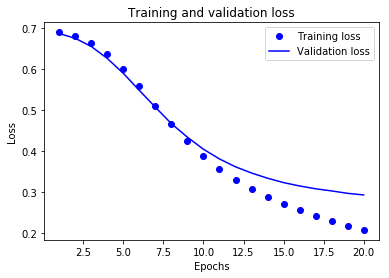

In [51]:
# Plot Loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

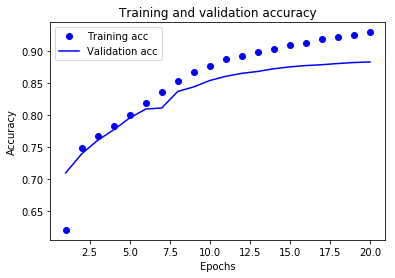

In [52]:
# Plot Acc
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()